# An analysis into Google Play Store Apps

This project has been undertaken using data about Google Play Store Apps, taken from [kaggle.com](https://www.kaggle.com/datasets/lava18/google-play-store-apps?select=googleplaystore.csv). The data extracted is in the form of a csv file which contains data about the specific apps and app categories on the store.

### Imports

In [1025]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the csv file as a dataframe

In [1026]:
apps = pd.read_csv('googleplaystore.csv')
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Cleaning the data

Before manipulating the data for visualisation purposes, it is important to clean the dataframes to ensure that it is accurate and complete.
First, the dataframe is checked for any duplicates, which are then removed to eliminate any redundant data.

The original number of apps in this DataFrame was 10831, but since removing duplicates, this has reduced to 10358. I chose to include the argument (inplace=True) to remove the duplicates from the original DataFrame that is being worked with. The DataFrame will later be reindexed to adjust for the now deleted duplicated values.

In [1027]:
apps[apps.duplicated()]
apps.drop_duplicates(inplace=True)
# apps_index = apps.reset_index()
# apps_index

In [1028]:
# apps_index.sort_values('Price')

In [1029]:
# Changing the Price value for index 9990 from 'Everyone' (which does not make sense as a price) to 0.
# apps_index.at[9990, 'Price'] = 0

### Editing the Price Column

Removing the $ symbol from the price amounts and converting the Price column into floats. This is to enable this column to perform mathematical calculations, such as the sum and mean, when it comes to querying the data.

In [1030]:
apps_price = apps['Price'].str.replace('$', '')
apps_price
apps['Price'] = apps_price
apps.head()
# # apps_index['Price'].astype(float)
# apps_index['Price'] = apps_index['Price'].astype(float)
# # Shows that the Price column has been converted into a float
# apps_index.dtypes
# # apps['Price2'] = apps2
# # apps
# # # apps['Price'].astype(float)
# # apps['Price'] = apps['Price'].astype(float)
# # apps['Price'].sum()
# # apps.dtypes

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Since I removed the $ symbol from each individual price value, I have ammended the column title to make it clear what the currency is.

In [1042]:
apps = apps.rename(columns={'Price': 'Price ($)'})
apps.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Updating an incomplete row

I noticed that the app 'Life Made WI-Fi Touchscreen Photo Frame' did not have its data inputted accurately, as all of the fields beginning in the Category column need to be shifted one place to the right to ensure that the data matches the column heading it should be placed in. For instance, the Category value is currently 1.9, which is not correct for a Category name, but makes sense for the Rating, which is the next column along. This is the case for all of the subsequent column values.
The Category field is consequently left blank, making it incomplete, so I have added in an appropriate Category to fill this in. I have also updated the Content Rating and Genres fields to reflect so that they are not NaN values. I have done this by consulting on the Google Play Store to see what those values should be.

Locating the specific app that needs to be edited:

In [1032]:
wifi_app = apps[apps.App == 'Life Made WI-Fi Touchscreen Photo Frame']
wifi_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Shifting the values of the Category column to the Android Ver column one place to the right:

In [1033]:
wifi_app2 = wifi_app[['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price ($)', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']]
wifi_app_shifted = wifi_app2.shift(periods=1, axis="columns")
wifi_app_shifted

,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,None,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


Updating the wifi_app_shifted DataFrame to include the App name and updating the Category, Content Rating and Genres values:

In [1043]:
# new_wifi_app = wifi_app_shifted.insert(0, 'App', ['Life Made WI-Fi Touchscreen Photo Frame'], True)
# new_wifi_app
# wifi_app_shifted.drop(columns=['App'])
# wifi_app_shifted
# wifi_app_shifted.drop(columns=['App'])
# new_wifi_app = wifi_app_shifted.drop(columns=['App'])
# new_wifi_app.insert(0, 'App', ['Life Made WI-Fi Touchscreen Photo Frame'], True)
# new_wifi_app
# # new_wifi_app = wifi_app_shifted.drop(columns=['App'])
# # new_wifi_app
# new_wifi_app.at[9990, 'Category'] = 'LIFESTYLE'
# new_wifi_app.at[9990, 'Content Rating'] = 'Everyone'
# new_wifi_app.at[9990, 'Genres'] = 'Lifestyle'
# # new_wifi_app
new_wifi_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Lifestyle,"February 11, 2018",1.0.19,4.0 and up


Dropping the current row with the index of the app:

In [1045]:
apps = apps.drop([9989])
apps

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10354,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10355,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10356,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,10000000,Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Concatenating the new_wifi_app DataFrame to the apps DataFrame:

In [1036]:
apps = pd.concat([apps, new_wifi_app])
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Resetting the index for the apps DataFrame to account for the newly added new_wifi_app DataFrame that was amended above:

In [1037]:
apps.reset_index(inplace=True)
apps

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10354,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10355,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10356,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### Reformatting the Rating, Reviews, Installs and Price columns

Removing the '+' and ',' from the Installs so that the values can be converted into integers:

In [1038]:
apps_installs = apps['Installs'].str.replace('+', '')
apps['Installs'] = apps_installs
apps.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [1039]:
apps_installs2 = apps['Installs'].str.replace(',', '')
apps_installs2

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10353         100
10354        1000
10355        1000
10356    10000000
10357        1000
Name: Installs, Length: 10358, dtype: object

In [1040]:
apps['Installs'] = apps_installs2
apps.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Converting the Installs and Reviews to integers and the Price and Rating to floats:

In [1046]:
apps['Installs'] = apps['Installs'].astype(int)
apps['Price ($)'] = apps['Price ($)'].astype(float)
apps['Rating'] = apps['Rating'].astype(float)
apps['Reviews'] = apps['Reviews'].astype(int)
apps.dtypes

index               int64
App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs            int32
Type               object
Price ($)         float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
apps = apps.drop(columns=['level_0', 'index'])

In [1047]:
result = apps[apps.Installs == 'Free']
result

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
apps = apps.drop([9989])

In [1050]:
apps.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Visualisation

Text(0.5, 0.98, 'Jointplot showing the relationship between the price of apps and their ratings')

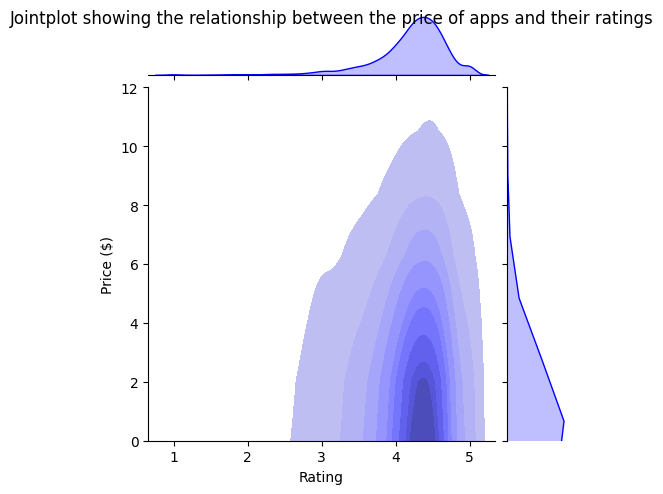

In [1068]:
jointplot = sns.jointplot(x=apps['Rating'], y=apps['Price ($)'], kind='kde', color='blue', fill=True, height=5)
jointplot.ax_marg_y.set_ylim(0, 12)
plt.suptitle('Jointplot showing the relationship between the price of apps and their ratings')

In [1052]:
average_price = apps.groupby('Category').mean(numeric_only=True)
category_prices = average_price.sort_values('Price ($)', ascending=False).head(10)
category_prices

,index,Rating,Reviews,Installs,Price ($)
Category,,,,,
FINANCE,5558.047222,4.127445,47221.919444,2.139858e+06,8.057861
LIFESTYLE,5971.016043,4.088889,34279.663102,1.430012e+06,6.312487
MEDICAL,4108.549020,4.182450,3423.424020,1.034416e+05,2.501691
EVENTS,3210.281250,4.435556,2515.906250,2.495806e+05,1.718594
FAMILY,6787.393721,4.191153,204205.851261,5.168138e+06,1.245919
PRODUCTIVITY,6188.680590,4.201796,251976.653563,3.062185e+07,0.616536
BOOKS_AND_REFERENCE,5928.030435,4.347458,95100.986957,8.332476e+06,0.520739
BUSINESS,6559.169014,4.102593,29009.791080,2.027382e+06,0.411479
WEATHER,5794.439024,4.244000,178106.524390,5.196348e+06,0.395366


Text(0.5, 1.0, 'Boxplot of the top 10 most expensively priced app categories')

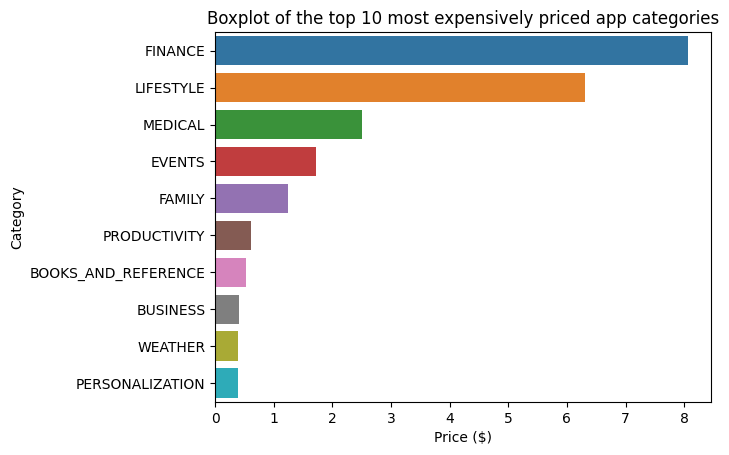

In [1078]:
price_bar = sns.barplot(category_prices, y="Category", x="Price ($)", hue='Category')
plt.title('Boxplot of the top 10 most expensively priced app categories')

In [1055]:
# create new df from apps df with only top 10 highest most expensive app categories
# find out which categories have the most installs
# then we know whether charging high prices is worth it - if there are many installs it is
# expensive_apps = apps[apps['Category']isin(['EVENTS', 'EDUCATION'])]
# expensive_apps = apps[['Category', 'Rating']]
categories = ['FINANCE', 'LIFESTYLE', 'MEDICAL', 'EVENTS', 'FAMILY', 'PRODUCTIVITY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'WEATHER', 'PERSONALIZATION']
expensive_apps = apps[apps['Category'].isin(categories)]
expensive_apps.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
140,140,E-Book Read - Read Book for free,BOOKS_AND_REFERENCE,4.5,1857,4.9M,50000,Free,0.0,Everyone,Books & Reference,"August 3, 2018",1.3.2,4.4 and up
141,141,Download free book with green book,BOOKS_AND_REFERENCE,4.6,4478,9.5M,100000,Free,0.0,Everyone 10+,Books & Reference,"July 31, 2017",1.1,4.0 and up
142,142,Wikipedia,BOOKS_AND_REFERENCE,4.4,577550,Varies with device,10000000,Free,0.0,Everyone,Books & Reference,"August 2, 2018",Varies with device,Varies with device
143,143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,Varies with device,100000000,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device


Text(0.5, 1.0, 'Histogram of the number of apps within the top 10 most expensively priced app categories')

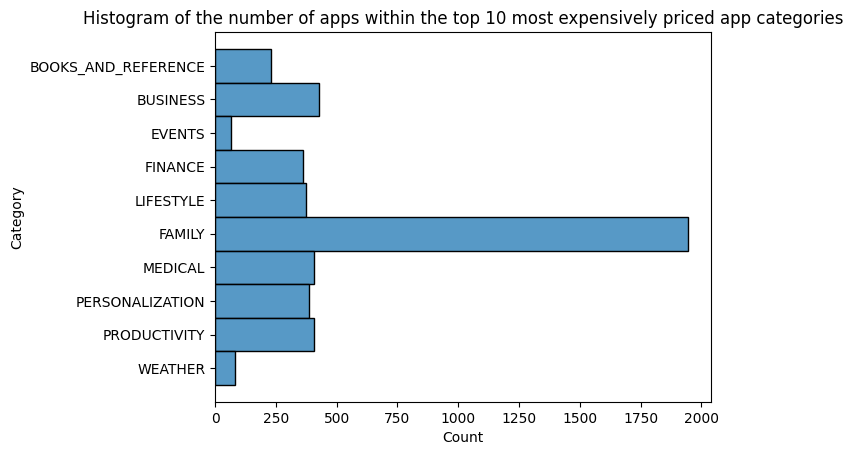

In [1057]:
sns.histplot(data=expensive_apps, y="Category")
plt.title('Histogram of the number of apps within the top 10 most expensively priced app categories')

Text(0.5, 1.0, 'Strip Plot of the rating distribution of the top 10 most expensively priced app categories')

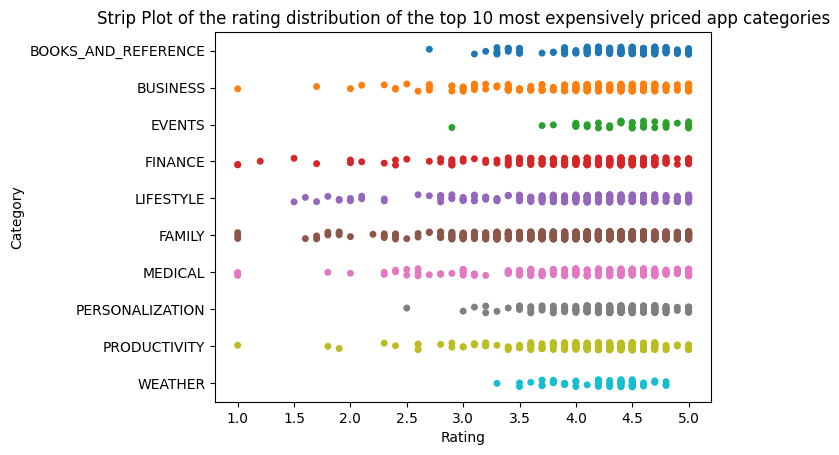

In [1077]:
sns.stripplot(data=expensive_apps, x="Rating", y="Category", hue='Category')
plt.title('Strip Plot of the rating distribution of the top 10 most expensively priced app categories')

In [1061]:
# Top rated apps
average_ratings = apps.groupby('Category').mean(numeric_only=True)
average_ratings[average_ratings['Rating'] > 4.25]
category_ratings = average_ratings.sort_values('Rating', ascending=False).head(10)
category_ratings

,index,Rating,Reviews,Installs,Price ($)
Category,,,,,
EVENTS,3210.281250,4.435556,2.515906e+03,2.495806e+05,1.718594
EDUCATION,770.992308,4.375969,1.781962e+05,4.107323e+06,0.138154
ART_AND_DESIGN,1500.984615,4.358065,2.637600e+04,1.912894e+06,0.091846
BOOKS_AND_REFERENCE,5928.030435,4.347458,9.510099e+04,8.332476e+06,0.520739
PERSONALIZATION,5970.755155,4.333871,1.937968e+05,5.346636e+06,0.390387
PARENTING,4112.516667,4.300000,1.597218e+04,5.253518e+05,0.159667
GAME,5473.471900,4.281285,1.262745e+06,2.813918e+07,0.256289
BEAUTY,1781.207547,4.278571,7.476226e+03,5.131519e+05,0.000000
HEALTH_AND_FITNESS,4134.895425,4.261450,1.008013e+05,4.447786e+06,0.210294


Text(0.5, 1.0, 'Boxplot of the top 10 best rated app categories')

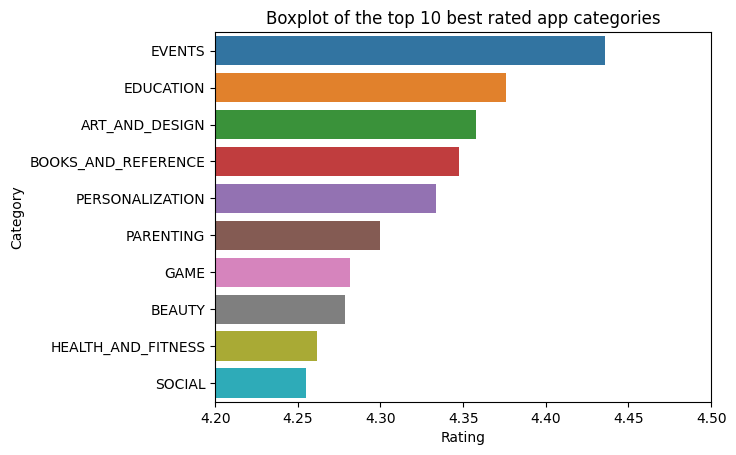

In [1079]:
ratings_bar = sns.barplot(category_ratings, y="Category", x="Rating", hue='Category')
ratings_bar.set(xlim=(4.2,4.5))
plt.title('Boxplot of the top 10 best rated app categories')
# Compare whether they are free or not

In [1063]:
install_sum = apps.groupby('Category').sum(numeric_only=True)
install_sum['Installs']
category_installs = install_sum.sort_values('Installs', ascending=False).head(10)
category_installs['Installs']

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452771915
FAMILY                10041692505
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

In [1074]:
averages = apps.groupby('Category').mean(numeric_only=True)
# average_price = averages[averages['Price ($)'] > 0.99]
averages['Rating']

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.347458
BUSINESS               4.102593
COMICS                 4.155172
COMMUNICATION          4.151466
DATING                 3.971698
EDUCATION              4.375969
ENTERTAINMENT          4.136036
EVENTS                 4.435556
FAMILY                 4.191153
FINANCE                4.127445
FOOD_AND_DRINK         4.164151
GAME                   4.281285
HEALTH_AND_FITNESS     4.261450
HOUSE_AND_HOME         4.164706
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.088889
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.182450
NEWS_AND_MAGAZINES     4.128505
PARENTING              4.300000
PERSONALIZATION        4.333871
PHOTOGRAPHY            4.182895
PRODUCTIVITY           4.201796
SHOPPING               4.251485
SOCIAL                 4.254918
SPORTS                 4.225175
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.094146

<Axes: xlabel='Price ($)', ylabel='Rating'>

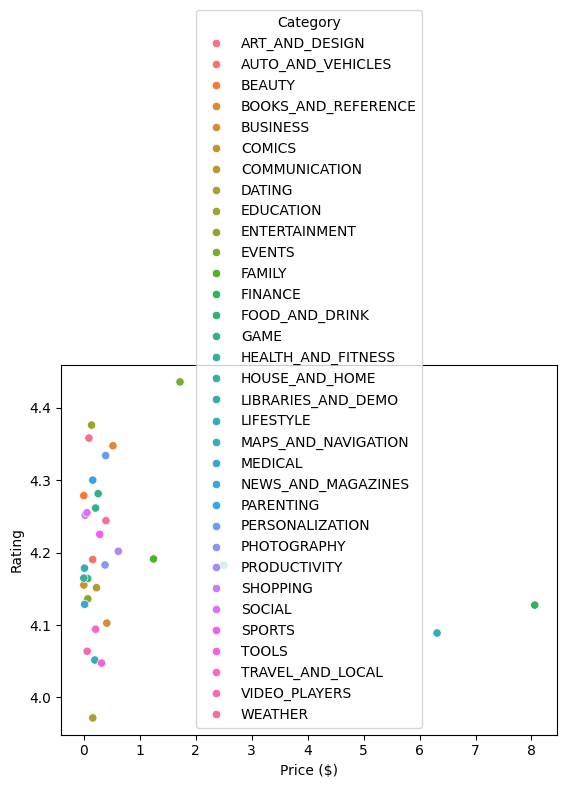

In [1073]:
sns.scatterplot(average_price, y="Rating", x="Price ($)", hue="Category")

In [ ]:
events = apps[apps['Category'] == 'EVENTS']
events